In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from imblearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
#check for NaN values
data.isna().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [28]:
X = data.drop('quality',axis=1).values
y = data.quality.values

In [147]:
correlation = data.corr()  
correlation.style.background_gradient(cmap = 'coolwarm')  

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [30]:
data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Let's see how quality and alcohol are related

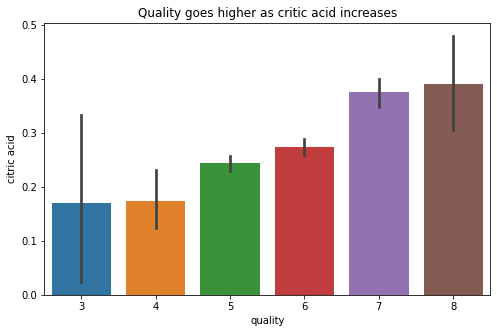

In [159]:
plt.figure(figsize=(8,5))
sns.barplot(x = 'quality', y = 'citric acid', data = data)
plt.title('Quality goes higher as critic acid increases')
plt.show()

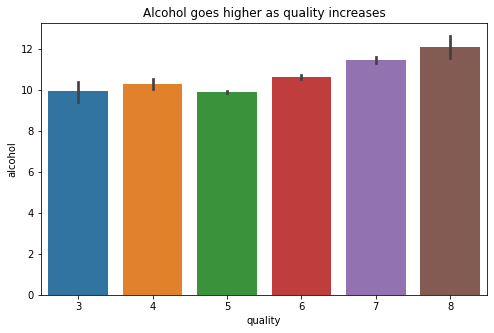

In [161]:
plt.figure(figsize=(8,5))
sns.barplot(x = 'quality', y = 'alcohol', data = data)
plt.title('Alcohol goes higher as quality increases')
plt.show()

Let's see the target Column values

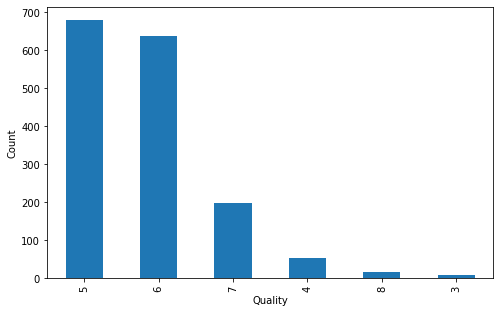

In [158]:
plt.figure(figsize=(8,5))
data['quality'].value_counts().plot.bar()
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

Split data and create pipelines

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [138]:
#Random Forest Pipeline
RandomForestPipe = Pipeline([
    ('scaler', StandardScaler()),
    ('RF_clf',RandomForestClassifier())
],verbose=True)

#DecisionTree Pipeline
DecisionTreePipe = Pipeline([
    ('scaler', StandardScaler()),
    ('DT_clf',DecisionTreeClassifier())
],verbose=True)

#Gaussian Naive Bayes Pipeline
NaivePipe = Pipeline([
    ('scaler', StandardScaler()),
    ('Naive_clf',GaussianNB())
],verbose=True)

KNNPipe = Pipeline([
    ('scaler', StandardScaler()),
    ('KNN_clf',KNeighborsClassifier())
],verbose=True)

In [141]:
#Define the pipelines in a list
pipesList = [RandomForestPipe,DecisionTreePipe,NaivePipe,KNNPipe]

#Dictionary
pipeDictionary = {0: 'Random Forest', 1:'Decision Tree', 2:'Naive Bayes', 3:'KNN'}

#fit the pipelines
for pipe in pipesList:
    pipe.fit(X_train,y_train)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............ (step 2 of 2) Processing RF_clf, total=   0.3s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............ (step 2 of 2) Processing DT_clf, total=   0.0s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ......... (step 2 of 2) Processing Naive_clf, total=   0.0s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ........... (step 2 of 2) Processing KNN_clf, total=   0.0s


In [162]:
for i, model in enumerate(pipesList):
    print("{} score: {}".format(pipeDictionary[i],model.score(X_test,y_test)))

Random Forest score: 0.7
Decision Tree score: 0.6104166666666667
Naive Bayes score: 0.54375
KNN score: 0.5708333333333333
